In [32]:
# -----------------------------
# Data manipulation
# -----------------------------
import pandas as pd
import numpy as np
import json
import ast

# -----------------------------
# Plotting
# -----------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import requests
from io import StringIO

In [33]:
# URL for country_lists.csv
url_country = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-09-09/country_lists.csv"

# Fetch CSV via requests (disable SSL verification temporarily)
response = requests.get(url_country, verify=False)
csv_data = StringIO(response.text)

# Read into pandas DataFrame
country_lists = pd.read_csv(csv_data)

# Quick check
print("Country Lists:")
country_lists.head()

c:\Users\ilyas\OneDrive\Desktop\DSA2101\src\venv-dsa2101\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



Country Lists:


,code,country,visa_required,visa_online,visa_on_arrival,visa_free_access,electronic_travel_authorisation
0,PS,Palestinian Territory,"[[{""code"":""AF"",""name"":""Afghanistan""},{""code"":""...","[[{""code"":""AG"",""name"":""Antigua and Barbuda""},{...","[[{""code"":""BD"",""name"":""Bangladesh""},{""code"":""B...","[[{""code"":""BO"",""name"":""Bolivia""},{""code"":""CK"",...","[[{""code"":""LK"",""name"":""Sri Lanka""},{""code"":""KE..."
1,AD,Andorra,"[[{""code"":""AF"",""name"":""Afghanistan""},{""code"":""...","[[{""code"":""AO"",""name"":""Angola""},{""code"":""AZ"",""...","[[{""code"":""BH"",""name"":""Bahrain""},{""code"":""BD"",...","[[{""code"":""JP"",""name"":""Japan""},{""code"":""AL"",""n...","[[{""code"":""AU"",""name"":""Australia""},{""code"":""CA..."
2,VA,Vatican City,"[[{""code"":""AF"",""name"":""Afghanistan""},{""code"":""...","[[{""code"":""AZ"",""name"":""Azerbaijan""},{""code"":""B...","[[{""code"":""BH"",""name"":""Bahrain""},{""code"":""BD"",...","[[{""code"":""AL"",""name"":""Albania""},{""code"":""AD"",...","[[{""code"":""AU"",""name"":""Australia""},{""code"":""CA..."
3,SM,San Marino,"[[{""code"":""AF"",""name"":""Afghanistan""},{""code"":""...","[[{""code"":""AZ"",""name"":""Azerbaijan""},{""code"":""B...","[[{""code"":""BH"",""name"":""Bahrain""},{""code"":""BD"",...","[[{""code"":""JP"",""name"":""Japan""},{""code"":""AL"",""n...","[[{""code"":""AU"",""name"":""Australia""},{""code"":""CA..."
4,MC,Monaco,"[[{""code"":""AF"",""name"":""Afghanistan""},{""code"":""...","[[{""code"":""AZ"",""name"":""Azerbaijan""},{""code"":""B...","[[{""code"":""BH"",""name"":""Bahrain""},{""code"":""BD"",...","[[{""code"":""JP"",""name"":""Japan""},{""code"":""AL"",""n...","[[{""code"":""AU"",""name"":""Australia""},{""code"":""CA..."


In [34]:


def flatten_json_list(x):
    if pd.isnull(x):
        return []
    parsed = json.loads(x)
    # Flatten the list of lists
    flat = [item for sublist in parsed for item in sublist]
    return flat

visa_columns = [
    'visa_required',
    'visa_online',
    'visa_on_arrival',
    'visa_free_access',
    'electronic_travel_authorisation'
]

for col in visa_columns:
    country_lists[col + "_parsed"] = country_lists[col].apply(flatten_json_list)



In [35]:
for col in visa_columns:
    country_lists[col + "_codes"] = country_lists[col + "_parsed"].apply(lambda lst: [d['code'] for d in lst])
    country_lists[col + "_names"] = country_lists[col + "_parsed"].apply(lambda lst: [d['name'] for d in lst])
    country_lists[col + "_count"] = country_lists[col + "_parsed"].apply(len)

country_lists.head()


,code,country,visa_required,visa_online,visa_on_arrival,visa_free_access,electronic_travel_authorisation,visa_required_parsed,visa_online_parsed,visa_on_arrival_parsed,...,visa_online_count,visa_on_arrival_codes,visa_on_arrival_names,visa_on_arrival_count,visa_free_access_codes,visa_free_access_names,visa_free_access_count,electronic_travel_authorisation_codes,electronic_travel_authorisation_names,electronic_travel_authorisation_count
0,PS,Palestinian Territory,"[[{""code"":""AF"",""name"":""Afghanistan""},{""code"":""...","[[{""code"":""AG"",""name"":""Antigua and Barbuda""},{...","[[{""code"":""BD"",""name"":""Bangladesh""},{""code"":""B...","[[{""code"":""BO"",""name"":""Bolivia""},{""code"":""CK"",...","[[{""code"":""LK"",""name"":""Sri Lanka""},{""code"":""KE...","[{'code': 'AF', 'name': 'Afghanistan'}, {'code...","[{'code': 'AG', 'name': 'Antigua and Barbuda'}...","[{'code': 'BD', 'name': 'Bangladesh'}, {'code'...",...,40,"[BD, BI, KH, CV, KM, GW, IR, LA, MO, MV, MZ, P...","[Bangladesh, Burundi, Cambodia, Cape Verde Isl...",21,"[BO, CK, DM, EC, JO, MY, FM, NI, NU, VC, SZ, V...","[Bolivia, Cook Islands, Dominica, Ecuador, Jor...",15,"[LK, KE, SC]","[Sri Lanka, Kenya, Seychelles]",3
1,AD,Andorra,"[[{""code"":""AF"",""name"":""Afghanistan""},{""code"":""...","[[{""code"":""AO"",""name"":""Angola""},{""code"":""AZ"",""...","[[{""code"":""BH"",""name"":""Bahrain""},{""code"":""BD"",...","[[{""code"":""JP"",""name"":""Japan""},{""code"":""AL"",""n...","[[{""code"":""AU"",""name"":""Australia""},{""code"":""CA...","[{'code': 'AF', 'name': 'Afghanistan'}, {'code...","[{'code': 'AO', 'name': 'Angola'}, {'code': 'A...","[{'code': 'BH', 'name': 'Bahrain'}, {'code': '...",...,23,"[BH, BD, BI, KH, CV, KM, EG, GW, IR, JM, JO, K...","[Bahrain, Bangladesh, Burundi, Cambodia, Cape ...",35,"[JP, AL, AI, AG, AR, AM, AW, AT, BS, BY, BE, B...","[Japan, Albania, Anguilla, Antigua and Barbuda...",120,"[AU, CA, GU, NZ, MP, PR, AS, LK, US, VI, KR, K...","[Australia, Canada, Guam, New Zealand, Norther...",16
2,VA,Vatican City,"[[{""code"":""AF"",""name"":""Afghanistan""},{""code"":""...","[[{""code"":""AZ"",""name"":""Azerbaijan""},{""code"":""B...","[[{""code"":""BH"",""name"":""Bahrain""},{""code"":""BD"",...","[[{""code"":""AL"",""name"":""Albania""},{""code"":""AD"",...","[[{""code"":""AU"",""name"":""Australia""},{""code"":""CA...","[{'code': 'AF', 'name': 'Afghanistan'}, {'code...","[{'code': 'AZ', 'name': 'Azerbaijan'}, {'code'...","[{'code': 'BH', 'name': 'Bahrain'}, {'code': '...",...,23,"[BH, BD, BI, KH, CV, KM, GW, IR, JO, KW, LA, M...","[Bahrain, Bangladesh, Burundi, Cambodia, Cape ...",31,"[AL, AD, AG, AR, AM, AW, AT, BS, BY, BE, BZ, B...","[Albania, Andorra, Antigua and Barbuda, Argent...",114,"[AU, CA, NZ, LK, KR, KE, SC, GB, KN]","[Australia, Canada, New Zealand, Sri Lanka, So...",9
3,SM,San Marino,"[[{""code"":""AF"",""name"":""Afghanistan""},{""code"":""...","[[{""code"":""AZ"",""name"":""Azerbaijan""},{""code"":""B...","[[{""code"":""BH"",""name"":""Bahrain""},{""code"":""BD"",...","[[{""code"":""JP"",""name"":""Japan""},{""code"":""AL"",""n...","[[{""code"":""AU"",""name"":""Australia""},{""code"":""CA...","[{'code': 'AF', 'name': 'Afghanistan'}, {'code...","[{'code': 'AZ', 'name': 'Azerbaijan'}, {'code'...","[{'code': 'BH', 'name': 'Bahrain'}, {'code': '...",...,23,"[BH, BD, BO, BI, KH, CV, KM, EG, GW, IR, JO, K...","[Bahrain, Bangladesh, Bolivia, Burundi, Cambod...",33,"[JP, AL, AD, AI, AG, AR, AM, AW, AT, BS, BB, B...","[Japan, Albania, Andorra, Anguilla, Antigua an...",122,"[AU, CA, GU, NZ, MP, PR, AS, LK, US, VI, KR, S...","[Australia, Canada, Guam, New Zealand, Norther...",15
4,MC,Monaco,"[[{""code"":""AF"",""name"":""Afghanistan""},{""code"":""...","[[{""code"":""AZ"",""name"":""Azerbaijan""},{""code"":""B...","[[{""code"":""BH"",""name"":""Bahrain""},{""code"":""BD"",...","[[{""code"":""JP"",""name"":""Japan""},{""code"":""AL"",""n...","[[{""code"":""AU"",""name"":""Australia""},{""code"":""CA...","[{'code': 'AF', 'nam

In [36]:
# URL for rank_by_year.csv
url_rank = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-09-09/rank_by_year.csv"

# Fetch CSV via requests (disable SSL verification temporarily)
response = requests.get(url_rank, verify=False)
csv_data = StringIO(response.text)

# Read into pandas DataFrame
rank_by_year = pd.read_csv(csv_data)

# Quick check
print("Rank by Year:")
rank_by_year.head()
rank_by_year.dtypes

c:\Users\ilyas\OneDrive\Desktop\DSA2101\src\venv-dsa2101\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



Rank by Year:


code               object
country            object
region             object
rank                int64
visa_free_count     int64
year                int64
dtype: object

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

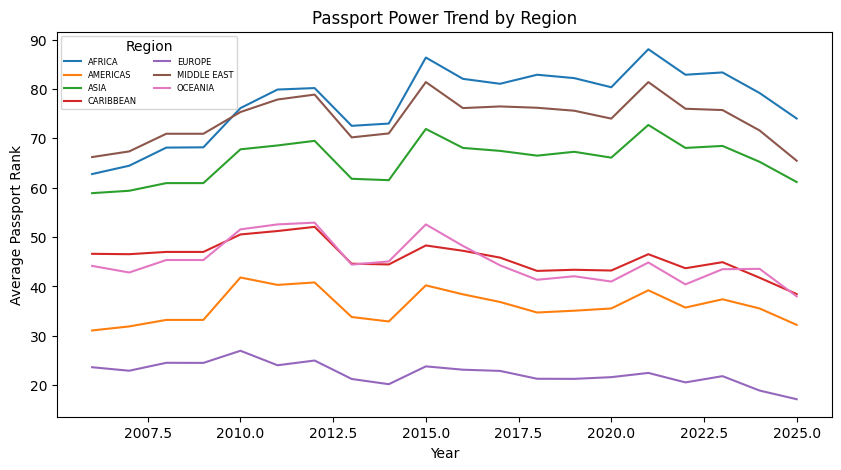

In [37]:
#### How has global passport power changed over time for different regions

rankings = rank_by_year.copy()
rankings.head()
region_rank = (rankings.groupby(["region", "year"], as_index = False)["rank"].mean().sort_values(["region", "year"]))
region_rank.head()


#Reshape the region so that each region is its own column ie so you can plot the regions on the y axis and the years on the x axis 
region_rank_wide = (region_rank.pivot(index = "year", columns = "region", values = "rank").sort_index()
                    .reset_index())
region_rank_wide.head()

#create line chare using the data frame 

region_rank_wide.plot(x = "year", y = region_rank_wide.columns[1:], kind = "line", 
                      figsize = (10,5), xlabel = "Year", ylabel = "Average Passport Rank", 
                      title = "Passport Power Trend by Region")

plt.legend(title = "Region", ncol = 2, fontsize = 6)
plt.tight_layout


<Axes: title={'center': 'Passport Rank vs Visa-free Access'}, xlabel='Visa-free destinations (average)', ylabel='Average passport rank'>

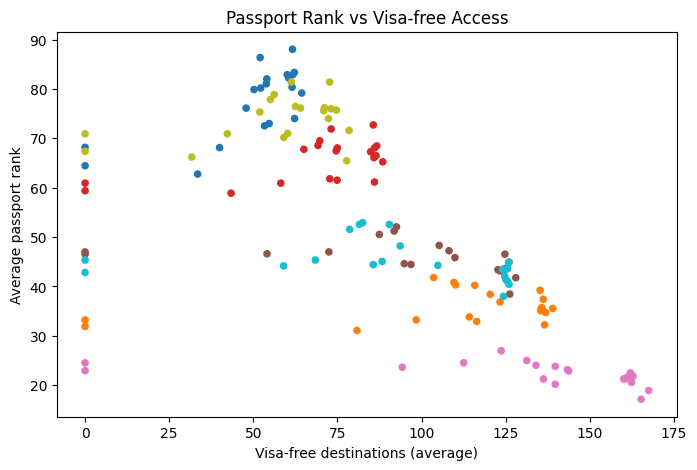

In [38]:
scatter_df = (
    rankings
    .dropna(subset=["region", "rank", "visa_free_count"])
    .groupby(["region", "year"], as_index=False)[["rank", "visa_free_count"]]
    .mean()
)

scatter_df["region_code"] = scatter_df["region"].astype("category").cat.codes
categories = scatter_df["region"].astype("category").cat.categories

scatter_df.plot(
    kind="scatter",
    x="visa_free_count",
    y="rank",
    c="region_code",
    cmap="tab10",
    colorbar=False,
    figsize=(8, 5),
    xlabel="Visa-free destinations (average)",
    ylabel="Average passport rank",
    title="Passport Rank vs Visa-free Access",
)



   region  year   avg_rank  best_rank  yoy_change
0  AFRICA  2006  62.770833         37         NaN
1  AFRICA  2007  64.458333         36    1.687500
2  AFRICA  2008  68.129630         35    3.671296
3  AFRICA  2009  68.185185         35    0.055556
4  AFRICA  2010  76.129630         38    7.944444


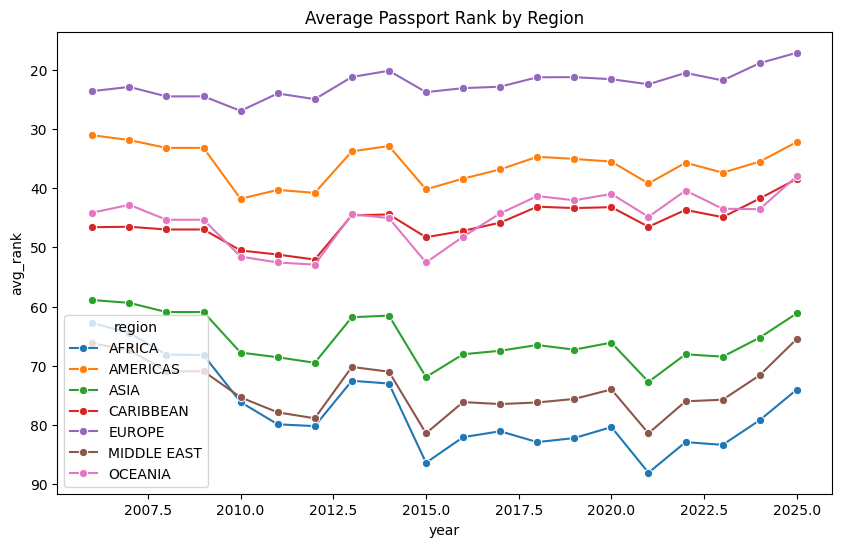

In [39]:
#Group according to region ie collapse the data to region year points 
region_year = rank_by_year.groupby(['region', 'year'], as_index = False).agg(avg_rank = ('rank', 'mean'), best_rank = ('rank', 'min'))
region_year.head()

region_year = (
    region_year
    .sort_values(['region', 'year'])
    .assign(yoy_change=lambda df: df.groupby('region')['avg_rank'].diff())

)

print(region_year.head())


plt.figure(figsize=(10,6))
sns.lineplot(data=region_year, x='year', y='avg_rank', hue='region', marker='o')
plt.gca().invert_yaxis()  # optional if smaller rank = stronger passport
plt.title('Average Passport Rank by Region')
plt.show()


  code      country region  rank  visa_free_count  year
0   AF  Afghanistan   ASIA   116               26  2021
1   AF  Afghanistan   ASIA   106               26  2020
2   AF  Afghanistan   ASIA   106               30  2018
3   AF  Afghanistan   ASIA   104               24  2017
4   AF  Afghanistan   ASIA   104               25  2016


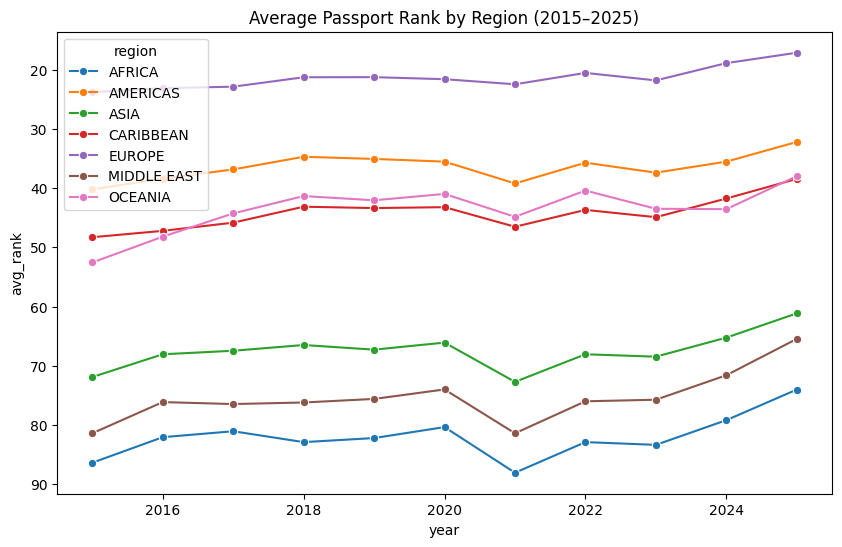

In [40]:
# filter to 2015–2025
subset = (
    rank_by_year
    .loc[rank_by_year['year'].between(2015, 2025)]
    .copy()
)
print(subset.head())

# collapse to region-year using the subset
region_year = (
    subset
    .groupby(['region', 'year'], as_index=False)
    .agg(avg_rank=('rank', 'mean'),
         best_rank=('rank', 'min'))
    .sort_values(['region', 'year'])
    .assign(yoy_change=lambda df: df.groupby('region')['avg_rank'].diff())
)

plt.figure(figsize=(10, 6))
sns.lineplot(data=region_year, x='year', y='avg_rank', hue='region', marker='o')
plt.gca().invert_yaxis()
plt.title('Average Passport Rank by Region (2015–2025)')
plt.show()

In [41]:
abs_diff_df = (
    region_year
    .sort_values(['region', 'year'])
    .assign(abs_change=lambda df:
            df.groupby('region')['avg_rank'].diff().abs())
)

abs_diff_df

,region,year,avg_rank,best_rank,yoy_change,abs_change
0,AFRICA,2015,86.370370,30,NaN,NaN
1,AFRICA,2016,82.055556,31,-4.314815,4.314815
2,AFRICA,2017,81.055556,29,-1.000000,1.000000
3,AFRICA,2018,82.888889,25,1.833333,1.833333
4,AFRICA,2019,82.203704,26,-0.685185,0.685185
...,...,...,...,...,...,...
72,OCEANIA,2021,44.857143,6,3.857143,3.857143
73,OCEANIA,2022,40.428571,6,-4.428571,4.428571
74,OCEANIA,2023,43.500000,7,3.071429,3.071429
75,OCEANIA,2024,43.571429,6,0.071429,0.071429


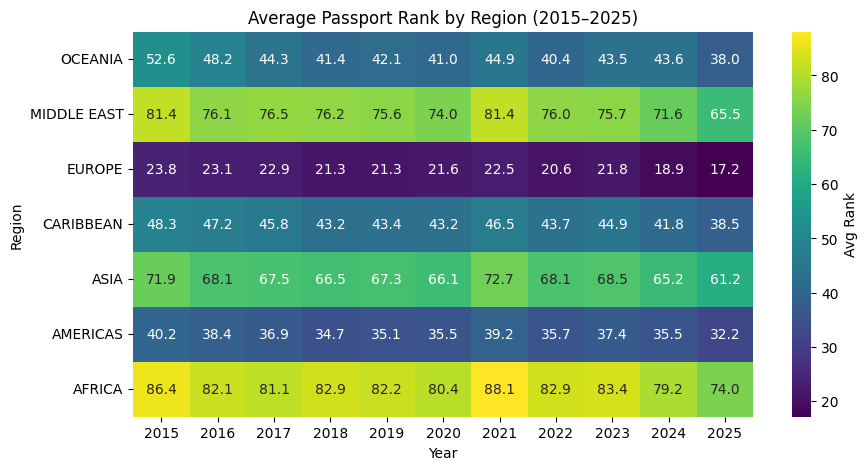

In [42]:
heat = (
    region_year
    .pivot(index='region', columns='year', values='avg_rank')
)

plt.figure(figsize=(10, 5))
sns.heatmap(
    heat,
    annot=True, fmt='.1f', cmap='viridis', cbar_kws={'label': 'Avg Rank'}
)
plt.gca().invert_yaxis()     # optional if lower rank = better
plt.title('Average Passport Rank by Region (2015–2025)')
plt.xlabel('Year')
plt.ylabel('Region')
plt.show()

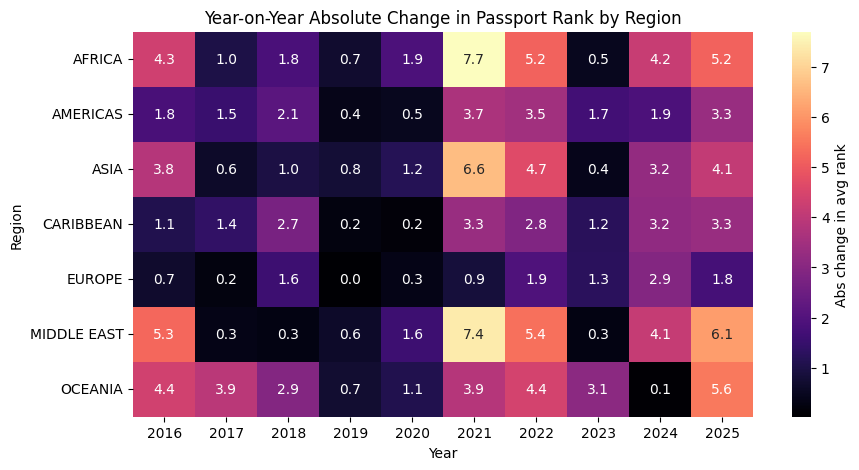

In [43]:
# assumes region_year already contains one row per region-year with avg_rank
abs_diff = (
    region_year
    .sort_values(['region', 'year'])
    .assign(abs_change=lambda df: (
        df.groupby('region')['avg_rank']
          .diff()
          .abs()
    ))
    .dropna(subset=['abs_change'])    # first year per region has no prior year
)

heat = abs_diff.pivot(index='region', columns='year', values='abs_change')

plt.figure(figsize=(10, 5))
sns.heatmap(
    heat,
    annot=True, fmt='.1f', cmap='magma',
    cbar_kws={'label': 'Abs change in avg rank'}
)
plt.title('Year-on-Year Absolute Change in Passport Rank by Region')
plt.xlabel('Year')
plt.ylabel('Region')
plt.show()

In [44]:
# Filter to 2015–2025 only
rank_filtered = rank_by_year[(rank_by_year["year"] >= 2015) & (rank_by_year["year"] <= 2025)]
years = sorted(rank_filtered["year"].unique())
regions = rank_filtered["region"].unique()

# Assign consistent colors per region
colors = px.colors.qualitative.Plotly[:len(regions)]
region_colors = dict(zip(regions, colors))

# Initialize figure
fig = go.Figure()

# Box plots per region per year
for year in years:
    df_year = rank_filtered[rank_filtered["year"] == year]
    for region in regions:
        df_region = df_year[df_year["region"] == region]
        fig.add_trace(go.Box(
            y = df_region["visa_free_count"],
            name = region,
            marker = dict(color = region_colors[region]),
            line = dict(color = region_colors[region], width = 2),
            boxmean = "sd",
            fillcolor = "rgba(0,0,0,0)",
            customdata = df_region["country"],
            hovertemplate = "<b>Region:</b> "+region+
                            "<br><b>Country:</b> %{customdata}"+
                            "<br><b>Visa-Free:</b> %{y}<extra></extra>",
            visible = True if year == years[0] else False
        ))

# Bar plots per region per year (initially hidden)
for year in years:
    df_year = rank_filtered[rank_filtered["year"] == year]
    for region in regions:
        df_region = df_year[df_year["region"] == region].sort_values("visa_free_count", ascending = False)
        fig.add_trace(go.Bar(
            x = df_region["country"],
            y = df_region["visa_free_count"],
            marker_color = region_colors[region],
            name = f"{region} - {year}",
            hovertemplate = "Country: %{x}<br>Visa-Free: %{y}<extra></extra>",
            visible=False  # initially hidden
        ))

# Slider steps
steps = []
box_traces_per_year = len(regions)
bar_traces_per_year = len(regions)

for i, year in enumerate(years):
    visibility = [False] * len(fig.data)
    start = i * box_traces_per_year
    end = start + box_traces_per_year
    for j in range(start, end):
        visibility[j] = True
    steps.append(dict(
        method = "update",
        label = str(year),
        args = [{"visible": visibility},
                {"title": f"Visa-Free Access Distribution by Region — {year}",
                 "yaxis": {"title": "Visa-Free Destinations", "range": [0, 210],
                           "showgrid": True, "gridcolor": "lightgrey", "dtick": 10},
                 "xaxis": {"tickangle": 0, "showgrid": True, "gridcolor": "lightgrey"}}]
    ))

sliders = [dict(
    active = 0,
    currentvalue = {"prefix": "Year: "},
    pad = {"t": 70},
    steps = steps
)]

# Buttons to switch between views
buttons = []

# Box plot button
buttons.append(dict(
    label = "📦 Box Plot",
    method = "update",
    args = [{"visible": [True] * box_traces_per_year + [False] * (len(fig.data) - box_traces_per_year)},
            {"title": f"Visa-Free Access Distribution by Region — {years[0]}",
             "yaxis": {"title": "Visa-Free Destinations", "range": [0, 210],
                       "showgrid": True, "gridcolor": "lightgrey", "dtick": 10},
             "xaxis": {"tickangle": 0, "showgrid": True, "gridcolor": "lightgrey"}}]
))

# Region bar plot buttons (show 2025 data by default)
year_2025_index = years.index(2025)  # find index of 2025
for r_idx, region in enumerate(regions):
    visibility = [False] * len(fig.data)
    # Calculate bar trace index for 2025
    bar_start = len(years) * box_traces_per_year + year_2025_index * bar_traces_per_year + r_idx
    if bar_start < len(fig.data):
        visibility[bar_start] = True
    buttons.append(dict(
        label = f"🏳️ {region}",
        method = "update",
        args = [{"visible": visibility},
                {"title": f"Visa-Free Access by Country — {region} (2025)",
                 "yaxis": {"title": "Visa-Free Destinations", "range": [0, 210],
                           "showgrid": True, "gridcolor": "lightgrey", "dtick": 10},
                 "xaxis": {"tickangle": -45, "showgrid": True, "gridcolor": "lightgrey"}}]
    ))

# Final layout
fig.update_layout(
    sliders = sliders,
    updatemenus = [dict(
        type = "dropdown",
        showactive = True,
        buttons = buttons,
        x = 1.02,
        xanchor = "left",
        y = 1.15,
        yanchor = "top"
    )],
    width = 1600,
    height = 900,
    template = "plotly_white",
    plot_bgcolor = "rgba(245,245,245,1)",
    paper_bgcolor = 'white',
    margin = dict(l = 80, r = 40, t = 100, b = 180),
    xaxis = dict(
        showgrid = True,
        gridcolor = "lightgrey",
        tickangle = 0,
        tickfont = dict(size = 10)
    ),
    yaxis = dict(
        showgrid = True,
        gridcolor = "lightgrey",
        tick0 = 0,
        dtick = 10,
        range = [0, 210]
    )
)

fig.show()

In [45]:
# ========= B) Per-region min/max by year, with dropdown =========
reg = (rank_filtered
       .groupby(['year','region'], as_index=False)
       .agg(min_vf=('visa_free_count','min'),
            max_vf=('visa_free_count','max')))

# Build traces: one per region for Min, one per region for Max
fig_reg_mm = go.Figure()

# Keep a visibility mask we’ll toggle via dropdown

vis_min = []
vis_max = []

for r in regions:
    df_r = reg[reg['region'] == r]
    # Min trace for region r
    fig_reg_mm.add_trace(go.Scatter(
        x=df_r['year'], y=df_r['min_vf'],
        mode='lines+markers', name=f'{r} (Min)',
        line=dict(width=2), marker=dict(size=6),
        marker_color=region_colors[r],
        hovertemplate='Year: %{x}<br>Region: '+r+'<br>Min: %{y}<extra></extra>',
        visible=True  # start with Min view
    ))
    vis_min.append(True)
    vis_max.append(False)

for r in regions:
    df_r = reg[reg['region'] == r]
    # Max trace for region r
    fig_reg_mm.add_trace(go.Scatter(
        x=df_r['year'], y=df_r['max_vf'],
        mode='lines+markers', name=f'{r} (Max)',
        line=dict(width=2),
        marker=dict(size=6),
        marker_color=region_colors[r],
        hovertemplate='Year: %{x}<br>Region: '+r+'<br>Max: %{y}<extra></extra>',
        visible=False  # hidden initially
    ))

# Dropdown to toggle Min vs Max
buttons = [
    dict(label='Min', method='update',
         args=[{'visible': vis_min + [False]*len(regions)},
               {'title':'Regional MIN Visa-Free Destinations (2015–2025)'}]),
    dict(label='Max', method='update',
         args=[{'visible': [False]*len(regions) + [True]*len(regions)},
               {'title':'Regional MAX Visa-Free Destinations (2015–2025)'}]),
]

fig_reg_mm.update_layout(
    title='Regional MIN Visa-Free Destinations (2015–2025)',
    xaxis_title='Year',
    yaxis_title='Visa-Free Destinations',
    yaxis=dict(range=[0, 210], dtick=10, showgrid=True, gridcolor='lightgrey'),
    template='plotly_white',
    width=1200, height=550,
    updatemenus=[dict(type='dropdown', buttons=buttons, x=1.02, xanchor='left', y=1.1)]
)

fig_reg_mm.show()


In [46]:
# === Per-region MIN & MAX over 2015–2025, keeping the country names ===
# Grab the actual rows at the extremes so we retain 'country'
rows_min_r = rank_filtered.loc[
    rank_filtered.groupby(['year','region'])['visa_free_count'].idxmin(),
    ['year','region','country','visa_free_count']
].rename(columns={'country':'min_country','visa_free_count':'min_vf'})

rows_max_r = rank_filtered.loc[
    rank_filtered.groupby(['year','region'])['visa_free_count'].idxmax(),
    ['year','region','country','visa_free_count']
].rename(columns={'country':'max_country','visa_free_count':'max_vf'})

# Merge to a single tidy frame per (year, region)
reg_extremes = rows_min_r.merge(rows_max_r, on=['year','region'])

import plotly.graph_objects as go
fig_reg_mm = go.Figure()

# One MIN trace and one MAX trace per region; hover shows the country at that extreme
for r in regions:
    df_r = reg_extremes[reg_extremes['region'] == r].sort_values('year')

    # MIN trace (solid line)
    fig_reg_mm.add_trace(go.Scatter(
        x=df_r['year'], y=df_r['min_vf'],
        mode='lines+markers',
        name=f'{r} — Min',
        line=dict(width=2),
        marker=dict(size=6),
        marker_color=region_colors[r],
        customdata=df_r['min_country'],
        hovertemplate=(
            'Year: %{x}'
            '<br>Region: ' + r +
            '<br>Min: %{y}'
            '<br>Country: %{customdata}<extra></extra>'
        )
    ))

    # MAX trace (dashed line)
    fig_reg_mm.add_trace(go.Scatter(
        x=df_r['year'], y=df_r['max_vf'],
        mode='lines+markers',
        name=f'{r} — Max',
        line=dict(width=2, dash='dash'),
        marker=dict(size=6),
        marker_color=region_colors[r],
        customdata=df_r['max_country'],
        hovertemplate=(
            'Year: %{x}'
            '<br>Region: ' + r +
            '<br>Max: %{y}'
            '<br>Country: %{customdata}<extra></extra>'
        )
    ))

fig_reg_mm.update_layout(
    title='Per-Region MIN & MAX Visa-Free Destinations (2015–2025)',
    xaxis_title='Year',
    yaxis_title='Visa-Free Destinations',
    yaxis=dict(range=[0, 210], dtick=10, showgrid=True, gridcolor='lightgrey'),
    template='plotly_white',
    width=1200, height=600,
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='left', x=0)
)
fig_reg_mm.show()


In [47]:
import plotly.graph_objects as go

fig_reg_min = go.Figure()
for r in regions:
    df_r = rows_min_r[rows_min_r['region'] == r].sort_values('year')
    fig_reg_min.add_trace(go.Scatter(
        x=df_r['year'], y=df_r['min_vf'],
        mode='lines+markers',
        name=r,
        marker_color=region_colors[r],
        customdata=df_r['min_country'],
        hovertemplate=(
            'Year: %{x}'
            '<br>Region: ' + r +
            '<br>Min: %{y}'
            '<br>Country: %{customdata}<extra></extra>'
        )
    ))

fig_reg_min.update_layout(
    title='Per-Region MIN Visa-Free Destinations (2015–2025)',
    xaxis_title='Year',
    yaxis_title='Visa-Free Destinations',
    yaxis=dict(range=[0,210], dtick=10, showgrid=True, gridcolor='lightgrey'),
    template='plotly_white',
    width=1200, height=550,
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='left', x=0)
)
fig_reg_min.show()


In [48]:
fig_reg_max = go.Figure()
for r in regions:
    df_r = rows_max_r[rows_max_r['region'] == r].sort_values('year')
    fig_reg_max.add_trace(go.Scatter(
        x=df_r['year'], y=df_r['max_vf'],
        mode='lines+markers',
        name=r,
        line=dict(),  # stylistic: differentiate from MIN plot
        marker_color=region_colors[r],
        customdata=df_r['max_country'],
        hovertemplate=(
            'Year: %{x}'
            '<br>Region: ' + r +
            '<br>Max: %{y}'
            '<br>Country: %{customdata}<extra></extra>'
        )
    ))

fig_reg_max.update_layout(
    title='Per-Region MAX Visa-Free Destinations (2015–2025)',
    xaxis_title='Year',
    yaxis_title='Visa-Free Destinations',
    yaxis=dict(range=[0,210], dtick=10, showgrid=True, gridcolor='lightgrey'),
    template='plotly_white',
    width=1200, height=550,
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='left', x=0)
)
fig_reg_max.show()


In [50]:
# URL for country_lists.csv
url_country = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-09-09/country_lists.csv"

# Fetch CSV via requests (disable SSL verification temporarily)
response = requests.get(url_country, verify=False)
csv_data = StringIO(response.text)

# Read into pandas DataFrame
country_lists = pd.read_csv(csv_data)

# Quick check
print("Country Lists:")
country_lists.head()

Country Lists:


c:\Users\ilyas\OneDrive\Desktop\DSA2101\src\venv-dsa2101\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



,code,country,visa_required,visa_online,visa_on_arrival,visa_free_access,electronic_travel_authorisation
0,PS,Palestinian Territory,"[[{""code"":""AF"",""name"":""Afghanistan""},{""code"":""...","[[{""code"":""AG"",""name"":""Antigua and Barbuda""},{...","[[{""code"":""BD"",""name"":""Bangladesh""},{""code"":""B...","[[{""code"":""BO"",""name"":""Bolivia""},{""code"":""CK"",...","[[{""code"":""LK"",""name"":""Sri Lanka""},{""code"":""KE..."
1,AD,Andorra,"[[{""code"":""AF"",""name"":""Afghanistan""},{""code"":""...","[[{""code"":""AO"",""name"":""Angola""},{""code"":""AZ"",""...","[[{""code"":""BH"",""name"":""Bahrain""},{""code"":""BD"",...","[[{""code"":""JP"",""name"":""Japan""},{""code"":""AL"",""n...","[[{""code"":""AU"",""name"":""Australia""},{""code"":""CA..."
2,VA,Vatican City,"[[{""code"":""AF"",""name"":""Afghanistan""},{""code"":""...","[[{""code"":""AZ"",""name"":""Azerbaijan""},{""code"":""B...","[[{""code"":""BH"",""name"":""Bahrain""},{""code"":""BD"",...","[[{""code"":""AL"",""name"":""Albania""},{""code"":""AD"",...","[[{""code"":""AU"",""name"":""Australia""},{""code"":""CA..."
3,SM,San Marino,"[[{""code"":""AF"",""name"":""Afghanistan""},{""code"":""...","[[{""code"":""AZ"",""name"":""Azerbaijan""},{""code"":""B...","[[{""code"":""BH"",""name"":""Bahrain""},{""code"":""BD"",...","[[{""code"":""JP"",""name"":""Japan""},{""code"":""AL"",""n...","[[{""code"":""AU"",""name"":""Australia""},{""code"":""CA..."
4,MC,Monaco,"[[{""code"":""AF"",""name"":""Afghanistan""},{""code"":""...","[[{""code"":""AZ"",""name"":""Azerbaijan""},{""code"":""B...","[[{""code"":""BH"",""name"":""Bahrain""},{""code"":""BD"",...","[[{""code"":""JP"",""name"":""Japan""},{""code"":""AL"",""n...","[[{""code"":""AU"",""name"":""Australia""},{""code"":""CA..."


In [51]:
json_cols = [
    'visa_required',
    'visa_online',
    'visa_on_arrival',
    'visa_free_access',
    'electronic_travel_authorisation'
]

import json

def clean_json_field(text):
    """Convert the messy stringified JSON fields into clean Python lists of dicts."""
    if pd.isna(text):
        return []
    try:
        data = json.loads(text)
        # Many fields are [[{...}]] — unwrap the extra list
        if isinstance(data, list) and len(data) == 1 and isinstance(data[0], list):
            data = data[0]
        return data
    except Exception as e:
        # Optional: print which rows failed to parse
        # print("Error parsing:", text[:80], e)
        return []
    
for col in json_cols:
    country_lists[col] = country_lists[col].apply(clean_json_field)

# Quick check
print("Cleaned Country Lists:")
country_lists.head()

Cleaned Country Lists:


,code,country,visa_required,visa_online,visa_on_arrival,visa_free_access,electronic_travel_authorisation
0,PS,Palestinian Territory,"[{'code': 'AF', 'name': 'Afghanistan'}, {'code...","[{'code': 'AG', 'name': 'Antigua and Barbuda'}...","[{'code': 'BD', 'name': 'Bangladesh'}, {'code'...","[{'code': 'BO', 'name': 'Bolivia'}, {'code': '...","[{'code': 'LK', 'name': 'Sri Lanka'}, {'code':..."
1,AD,Andorra,"[{'code': 'AF', 'name': 'Afghanistan'}, {'code...","[{'code': 'AO', 'name': 'Angola'}, {'code': 'A...","[{'code': 'BH', 'name': 'Bahrain'}, {'code': '...","[{'code': 'JP', 'name': 'Japan'}, {'code': 'AL...","[{'code': 'AU', 'name': 'Australia'}, {'code':..."
2,VA,Vatican City,"[{'code': 'AF', 'name': 'Afghanistan'}, {'code...","[{'code': 'AZ', 'name': 'Azerbaijan'}, {'code'...","[{'code': 'BH', 'name': 'Bahrain'}, {'code': '...","[{'code': 'AL', 'name': 'Albania'}, {'code': '...","[{'code': 'AU', 'name': 'Australia'}, {'code':..."
3,SM,San Marino,"[{'code': 'AF', 'name': 'Afghanistan'}, {'code...","[{'code': 'AZ', 'name': 'Azerbaijan'}, {'code'...","[{'code': 'BH', 'name': 'Bahrain'}, {'code': '...","[{'code': 'JP', 'name': 'Japan'}, {'code': 'AL...","[{'code': 'AU', 'name': 'Australia'}, {'code':..."
4,MC,Monaco,"[{'code': 'AF', 'name': 'Afghanistan'}, {'code...","[{'code': 'AZ', 'name': 'Azerbaijan'}, {'code'...","[{'code': 'BH', 'name': 'Bahrain'}, {'code': '...","[{'code': 'JP', 'name': 'Japan'}, {'code': 'AL...","[{'code': 'AU', 'name': 'Australia'}, {'code':..."


In [52]:
visa_cols = [
    'visa_required',
    'visa_online',
    'visa_on_arrival',
    'visa_free_access',
    'electronic_travel_authorisation'
]

from pandas import json_normalize

flat_frames = []

for col in visa_cols:
    temp = country_lists[['code', 'country', col]].explode(col)
    temp = temp.dropna(subset=[col])
    temp['visa_type'] = col
    temp['to_code'] = temp[col].apply(lambda x: x.get('code') if isinstance(x, dict) else None)
    temp['to_name'] = temp[col].apply(lambda x: x.get('name') if isinstance(x, dict) else None)
    temp = temp.drop(columns=[col])
    flat_frames.append(temp)

# Combine all into one DataFrame
flat_df = pd.concat(flat_frames, ignore_index=True)

# Remove rows missing target country codes
flat_df = flat_df.dropna(subset=['to_code'])

# Drop duplicates if any
flat_df = flat_df.drop_duplicates(subset=['code', 'to_code', 'visa_type']).reset_index(drop=True)

# Optional: rename columns for clarity
flat_df.rename(columns={
    'code': 'from_code',
    'country': 'from_country'
}, inplace=True)


# Quick check
print("Flattened Visa Data:")
flat_df.head()

Flattened Visa Data:


,from_code,from_country,visa_type,to_code,to_name
0,PS,Palestinian Territory,visa_required,AF,Afghanistan
1,PS,Palestinian Territory,visa_required,DZ,Algeria
2,PS,Palestinian Territory,visa_required,AD,Andorra
3,PS,Palestinian Territory,visa_required,AO,Angola
4,PS,Palestinian Territory,visa_required,AI,Anguilla


In [53]:
visa_summary = flat_df.groupby('visa_type').size().reset_index(name='count')
print(visa_summary)

                         visa_type  count
0  electronic_travel_authorisation   1382
1                 visa_free_access  15066
2                  visa_on_arrival   5316
3                      visa_online   5817
4                    visa_required  17392


In [54]:
visa_by_country = (
    flat_df.groupby(['from_country', 'visa_type'])
    .size()
    .reset_index(name='destination_count')
    .sort_values(['from_country', 'visa_type'])
)

visa_pivot = visa_by_country.pivot(
    index='from_country',
    columns='visa_type',
    values='destination_count'
).fillna(0).astype(int)
visa_pivot = visa_pivot.reset_index()
print("Visa Counts by Country:")
visa_pivot.head()

Visa Counts by Country:


visa_type,from_country,electronic_travel_authorisation,visa_free_access,visa_on_arrival,visa_online,visa_required
0,Afghanistan,3,6,16,43,158
1,Albania,6,88,29,29,74
2,Algeria,2,26,27,39,132
3,Andorra,16,120,35,23,32
4,Angola,2,26,20,37,141


In [55]:
import pandas as pd
import numpy as np
import json
import ast

# -----------------------------
# Plotting
# -----------------------------
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from io import StringIO

In [56]:
# URL for rank_by_year.csv
url_rank = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-09-09/rank_by_year.csv"

# Fetch CSV via requests (disable SSL verification temporarily)
response = requests.get(url_rank, verify=False)
csv_data = StringIO(response.text)

# Read into pandas DataFrame
rank_by_year = pd.read_csv(csv_data)

# Quick check
print("Rank by Year:")
print(rank_by_year)

c:\Users\ilyas\OneDrive\Desktop\DSA2101\src\venv-dsa2101\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



Rank by Year:
     code                country       region  rank  visa_free_count  year
0      AF            Afghanistan         ASIA   116               26  2021
1      AF            Afghanistan         ASIA   106               26  2020
2      AF            Afghanistan         ASIA   106               30  2018
3      AF            Afghanistan         ASIA   104               24  2017
4      AF            Afghanistan         ASIA   104               25  2016
...   ...                    ...          ...   ...              ...   ...
3945   PS  Palestinian Territory  MIDDLE EAST   102               37  2019
3946   PS  Palestinian Territory  MIDDLE EAST   105               37  2022
3947   PS  Palestinian Territory  MIDDLE EAST   103               38  2023
3948   PS  Palestinian Territory  MIDDLE EAST    98               40  2024
3949   PS  Palestinian Territory  MIDDLE EAST    93               39  2025

[3950 rows x 6 columns]


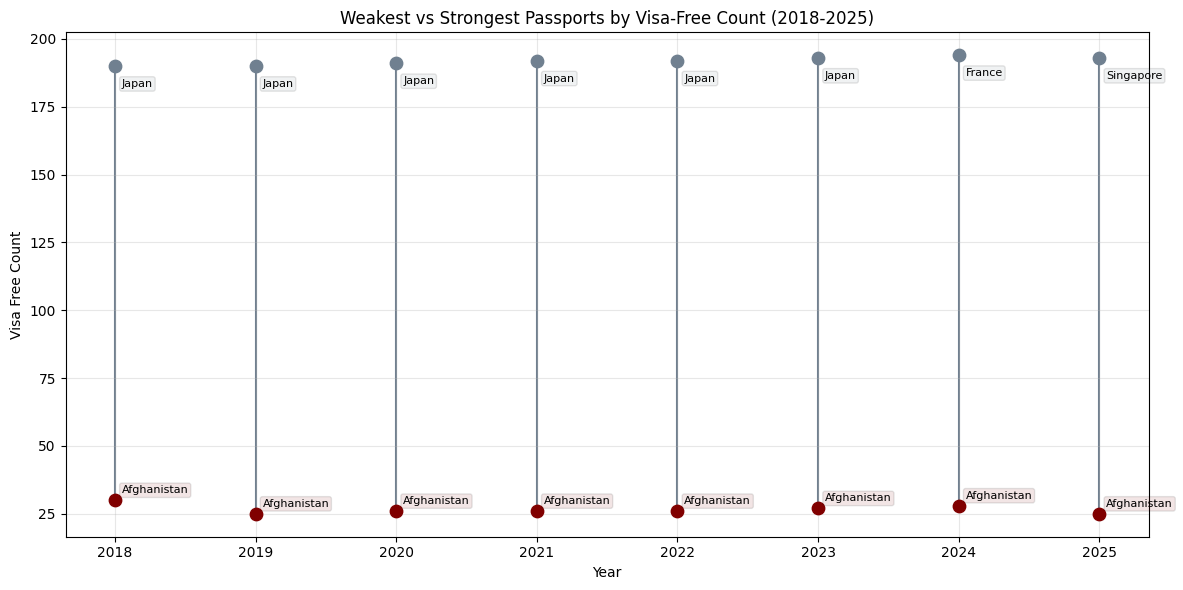

In [57]:
data = rank_by_year
data.dtypes

data["year"] = pd.to_numeric(data["year"]).astype(int)
subset = data[(data['year'] >= 2018) & (data['year'] <= 2025)]


max_visa = subset.loc[subset.groupby('year')['visa_free_count'].idxmax()]
min_visa = subset.loc[subset.groupby('year')['visa_free_count'].idxmin()]

res = pd.concat([max_visa, min_visa]).sort_values('year')

res = res.pivot_table(index = "year", columns = "country", values = "visa_free_count", aggfunc = "first")
res_tidy = res.reset_index()
res_tidy.columns.name = None

fig, ax = plt.subplots(figsize=(12, 6))

min_countries = []
max_countries = []

for year in res_tidy['year']:
    year_data = res_tidy[res_tidy['year'] == year].drop('year', axis=1)
    
    #Find min (excluding NaNs)
    min_val = year_data.min().min()
    min_country = year_data.idxmin(axis=1).iloc[0]
    min_countries.append((year, min_country, min_val))
    
    # Find max (excluding NaNs)
    max_val = year_data.max().max()
    max_country = year_data.idxmax(axis=1).iloc[0]
    max_countries.append((year, max_country, max_val))

# Convert to DataFrames
min_df = pd.DataFrame(min_countries, columns=['year', 'country', 'value'])
max_df = pd.DataFrame(max_countries, columns=['year', 'country', 'value'])

# Plot minimum line
ax.scatter(min_df['year'], min_df['value'], 
          color='maroon', s=80, zorder=3)

# Plot maximum line  
ax.scatter(max_df['year'], max_df['value'], 
          color='slategray', s=80, zorder=3)

ax.vlines(max_df["year"], min_df["value"], max_df["value"], color = 'slategray', zorder = 1)

# Add country labels for each point
for idx, row in min_df.iterrows():
    ax.annotate(row['country'], (row['year'], row['value']),
                xytext=(5, 5), textcoords='offset points', fontsize=8,
                bbox=dict(boxstyle='round,pad=0.2', facecolor='maroon', alpha=0.1))

for idx, row in max_df.iterrows():
    ax.annotate(row['country'], (row['year'], row['value']),
                xytext=(5, -15), textcoords='offset points', fontsize=8,
                bbox=dict(boxstyle='round,pad=0.2', facecolor='slategray', alpha=0.1))

ax.set(xlabel='Year', ylabel='Visa Free Count',
       title='Weakest vs Strongest Passports by Visa-Free Count (2018-2025)')
ax.set_xticks(res_tidy['year'].astype(int))
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [58]:
data.sort_values(by = ["country", "year"], ascending = True, inplace = True)

import plotly.express as px
import pandas as pd


# Create an animated choropleth map
fig = px.choropleth(
    data,
    locations = "country",
    locationmode = "country names",
    color = "visa_free_count",
    animation_frame = "year",   # 👈 this adds the time slider
    color_continuous_scale = "blues",
    projection = "natural earth",
    title = "Global Map with Time Slider"
)

fig.update_layout(
    geo = dict(showframe = False, showcoastlines = True),
    margin = dict(l = 0, r = 0, t = 30, b = 0)
)

fig.show()

C:\Users\ilyas\AppData\Local\Temp\ipykernel_13396\2191990181.py:8: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



In [59]:
max_year = rank_by_year['year'].max()
print(f"Max year in rank_by_year: {max_year}")

# Filter for the latest year
latest_rankings = rank_by_year[rank_by_year['year'] == max_year]
latest_rankings = latest_rankings.sort_values(by='rank')
print(latest_rankings)

Max year in rank_by_year: 2025
     code      country       region  rank  visa_free_count  year
2977   SG    Singapore         ASIA     1              193  2025
1669   JP        Japan         ASIA     2              190  2025
3097   KR  South Korea         ASIA     2              190  2025
1149   FI      Finland       EUROPE     3              189  2025
1589   IE      Ireland       EUROPE     3              189  2025
...   ...          ...          ...   ...              ...   ...
3793   YE        Yemen  MIDDLE EAST    95               32  2025
2579   PK     Pakistan         ASIA    95               32  2025
1569   IQ         Iraq  MIDDLE EAST    96               30  2025
3335   SY        Syria  MIDDLE EAST    97               27  2025
19     AF  Afghanistan         ASIA    98               25  2025

[199 rows x 6 columns]


In [60]:
# URL for country_lists.csv
url_country = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-09-09/country_lists.csv"

# Fetch CSV via requests (disable SSL verification temporarily)
response = requests.get(url_country, verify=False)
csv_data = StringIO(response.text)

# Read into pandas DataFrame
country_lists = pd.read_csv(csv_data)

# Quick check
print("Country Lists:")
country_lists.head()

c:\Users\ilyas\OneDrive\Desktop\DSA2101\src\venv-dsa2101\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



Country Lists:


,code,country,visa_required,visa_online,visa_on_arrival,visa_free_access,electronic_travel_authorisation
0,PS,Palestinian Territory,"[[{""code"":""AF"",""name"":""Afghanistan""},{""code"":""...","[[{""code"":""AG"",""name"":""Antigua and Barbuda""},{...","[[{""code"":""BD"",""name"":""Bangladesh""},{""code"":""B...","[[{""code"":""BO"",""name"":""Bolivia""},{""code"":""CK"",...","[[{""code"":""LK"",""name"":""Sri Lanka""},{""code"":""KE..."
1,AD,Andorra,"[[{""code"":""AF"",""name"":""Afghanistan""},{""code"":""...","[[{""code"":""AO"",""name"":""Angola""},{""code"":""AZ"",""...","[[{""code"":""BH"",""name"":""Bahrain""},{""code"":""BD"",...","[[{""code"":""JP"",""name"":""Japan""},{""code"":""AL"",""n...","[[{""code"":""AU"",""name"":""Australia""},{""code"":""CA..."
2,VA,Vatican City,"[[{""code"":""AF"",""name"":""Afghanistan""},{""code"":""...","[[{""code"":""AZ"",""name"":""Azerbaijan""},{""code"":""B...","[[{""code"":""BH"",""name"":""Bahrain""},{""code"":""BD"",...","[[{""code"":""AL"",""name"":""Albania""},{""code"":""AD"",...","[[{""code"":""AU"",""name"":""Australia""},{""code"":""CA..."
3,SM,San Marino,"[[{""code"":""AF"",""name"":""Afghanistan""},{""code"":""...","[[{""code"":""AZ"",""name"":""Azerbaijan""},{""code"":""B...","[[{""code"":""BH"",""name"":""Bahrain""},{""code"":""BD"",...","[[{""code"":""JP"",""name"":""Japan""},{""code"":""AL"",""n...","[[{""code"":""AU"",""name"":""Australia""},{""code"":""CA..."
4,MC,Monaco,"[[{""code"":""AF"",""name"":""Afghanistan""},{""code"":""...","[[{""code"":""AZ"",""name"":""Azerbaijan""},{""code"":""B...","[[{""code"":""BH"",""name"":""Bahrain""},{""code"":""BD"",...","[[{""code"":""JP"",""name"":""Japan""},{""code"":""AL"",""n...","[[{""code"":""AU"",""name"":""Australia""},{""code"":""CA..."


In [61]:
json_cols = [
    'visa_required',
    'visa_online',
    'visa_on_arrival',
    'visa_free_access',
    'electronic_travel_authorisation'
]

import json

def clean_json_field(text):
    """Convert the messy stringified JSON fields into clean Python lists of dicts."""
    if pd.isna(text):
        return []
    try:
        data = json.loads(text)
        # Many fields are [[{...}]] — unwrap the extra list
        if isinstance(data, list) and len(data) == 1 and isinstance(data[0], list):
            data = data[0]
        return data
    except Exception as e:
        # Optional: print which rows failed to parse
        # print("Error parsing:", text[:80], e)
        return []
    
for col in json_cols:
    country_lists[col] = country_lists[col].apply(clean_json_field)

# Quick check
print("Cleaned Country Lists:")
country_lists.head()

Cleaned Country Lists:


,code,country,visa_required,visa_online,visa_on_arrival,visa_free_access,electronic_travel_authorisation
0,PS,Palestinian Territory,"[{'code': 'AF', 'name': 'Afghanistan'}, {'code...","[{'code': 'AG', 'name': 'Antigua and Barbuda'}...","[{'code': 'BD', 'name': 'Bangladesh'}, {'code'...","[{'code': 'BO', 'name': 'Bolivia'}, {'code': '...","[{'code': 'LK', 'name': 'Sri Lanka'}, {'code':..."
1,AD,Andorra,"[{'code': 'AF', 'name': 'Afghanistan'}, {'code...","[{'code': 'AO', 'name': 'Angola'}, {'code': 'A...","[{'code': 'BH', 'name': 'Bahrain'}, {'code': '...","[{'code': 'JP', 'name': 'Japan'}, {'code': 'AL...","[{'code': 'AU', 'name': 'Australia'}, {'code':..."
2,VA,Vatican City,"[{'code': 'AF', 'name': 'Afghanistan'}, {'code...","[{'code': 'AZ', 'name': 'Azerbaijan'}, {'code'...","[{'code': 'BH', 'name': 'Bahrain'}, {'code': '...","[{'code': 'AL', 'name': 'Albania'}, {'code': '...","[{'code': 'AU', 'name': 'Australia'}, {'code':..."
3,SM,San Marino,"[{'code': 'AF', 'name': 'Afghanistan'}, {'code...","[{'code': 'AZ', 'name': 'Azerbaijan'}, {'code'...","[{'code': 'BH', 'name': 'Bahrain'}, {'code': '...","[{'code': 'JP', 'name': 'Japan'}, {'code': 'AL...","[{'code': 'AU', 'name': 'Australia'}, {'code':..."
4,MC,Monaco,"[{'code': 'AF', 'name': 'Afghanistan'}, {'code...","[{'code': 'AZ', 'name': 'Azerbaijan'}, {'code'...","[{'code': 'BH', 'name': 'Bahrain'}, {'code': '...","[{'code': 'JP', 'name': 'Japan'}, {'code': 'AL...","[{'code': 'AU', 'name': 'Australia'}, {'code':..."


In [62]:
visa_summary = flat_df.groupby('visa_type').size().reset_index(name='count')
print(visa_summary)

                         visa_type  count
0  electronic_travel_authorisation   1382
1                 visa_free_access  15066
2                  visa_on_arrival   5316
3                      visa_online   5817
4                    visa_required  17392


In [63]:
visa_by_country = (
    flat_df.groupby(['from_country', 'visa_type'])
    .size()
    .reset_index(name='destination_count')
    .sort_values(['from_country', 'visa_type'])
)

visa_pivot = visa_by_country.pivot(
    index='from_country',
    columns='visa_type',
    values='destination_count'
).fillna(0).astype(int)
visa_pivot = visa_pivot.reset_index()
print("Visa Counts by Country:")
visa_pivot.head()

Visa Counts by Country:


visa_type,from_country,electronic_travel_authorisation,visa_free_access,visa_on_arrival,visa_online,visa_required
0,Afghanistan,3,6,16,43,158
1,Albania,6,88,29,29,74
2,Algeria,2,26,27,39,132
3,Andorra,16,120,35,23,32
4,Angola,2,26,20,37,141


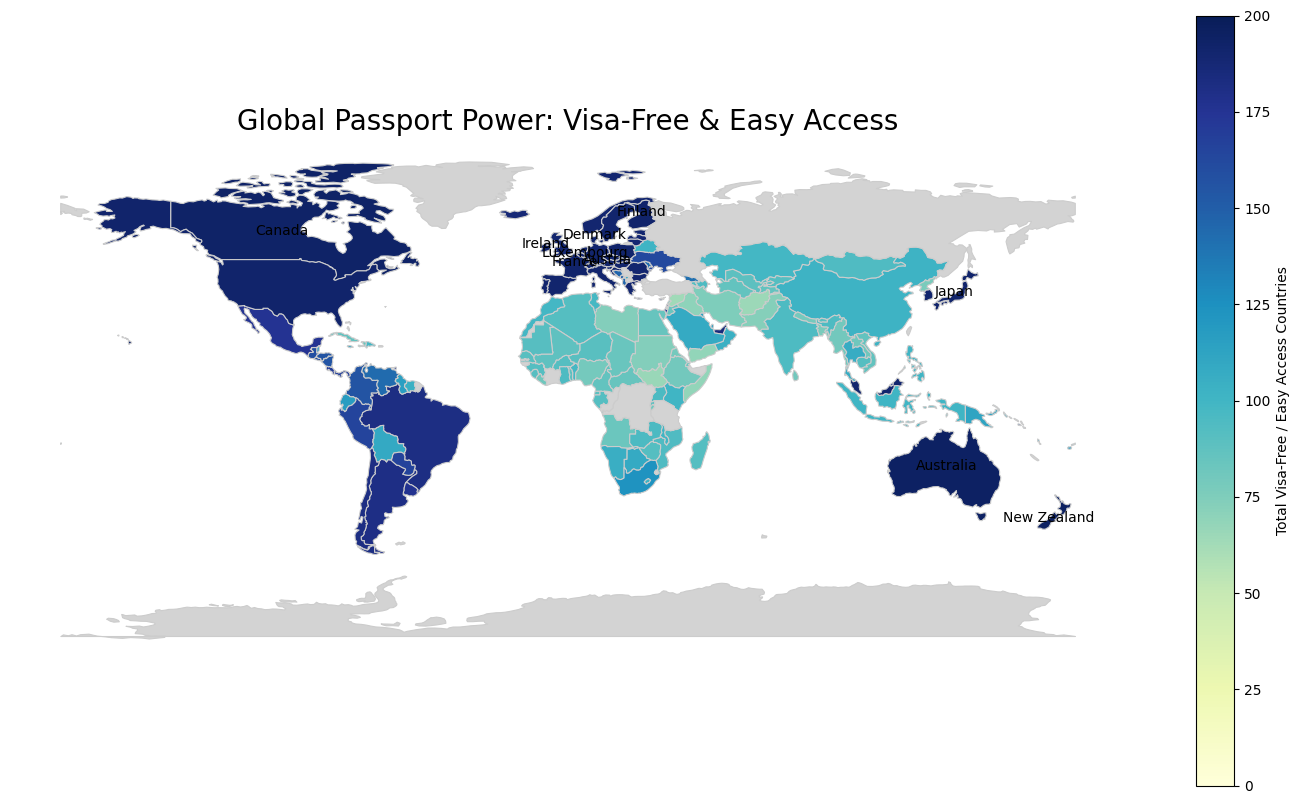

In [64]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load the Natural Earth low-resolution world map
world = gpd.read_file("https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json")

# Example: total visa-free access
visa_pivot['total_visa_free'] = visa_pivot['visa_free_access'] + visa_pivot['visa_on_arrival'] + visa_pivot['visa_online']

# Fix country name mismatches
name_corrections = {
    "United States": "United States of America",
    "Russia": "Russian Federation",
    "Vatican City": "Vatican",
    "Palestinian Territory": "Palestine",
    "Czechia": "Czech Republic",
    # add more if needed
}
visa_pivot['from_country'] = visa_pivot['from_country'].replace(name_corrections)

# Merge world map with visa data
world_visa = world.merge(visa_pivot, how='left', left_on='name', right_on='from_country')

# Plot
fig, ax = plt.subplots(1, 1, figsize=(18, 10))

world_visa.plot(
    column='total_visa_free',            # metric to color
    cmap='YlGnBu',                        # color palette
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={'label': "Total Visa-Free / Easy Access Countries"},
    missing_kwds={"color": "lightgrey"},  # grey for missing countries
    vmin=0,
    vmax=200
)

# Annotate top 10 countries
for idx, row in world_visa.nlargest(10, 'total_visa_free').iterrows():
    geom = row['geometry']
    # Get centroid of the largest polygon if MultiPolygon
    if geom.geom_type == 'MultiPolygon':
        largest_poly = max(geom.geoms, key=lambda a: a.area)
        centroid = largest_poly.centroid
    else:  # Polygon
        centroid = geom.centroid
    ax.text(centroid.x, centroid.y, row['from_country'], fontsize=10, ha='center')

# Title and remove axis
ax.set_title("Global Passport Power: Visa-Free & Easy Access", fontsize=20)
ax.set_axis_off()

plt.show()

In [65]:
visa_dest = pd.DataFrame({"country": country_lists["country"], "visa_free_destination": 0})
for visa_req, country in zip(flat_df["visa_type"], flat_df["to_name"]):
    if visa_req == "visa_free_access" or visa_req == "visa_on_arrival" or visa_req == "electronic_travel_authorisation":
        visa_dest.loc[visa_dest["country"] == country, "visa_free_destination"] += 1

In [66]:
visa_dest2 = visa_dest.merge(rank_by_year, on="country")
visa_dest2 = visa_dest2[["country", "visa_free_destination", "visa_free_count", "year"]]
visa_dest2 = visa_dest2[visa_dest2["year"] == 2025]

px.scatter(visa_dest2,
           x="visa_free_destination",
           y="visa_free_count",
           hover_name="country")